## Import Packages

In [1]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

** tf.keras.utils.get_file **
Downloads a file from a URL if it not already in the cache

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
df = pd.read_csv(csv_path)
# slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]
#Pop Return item and drop from frame. Raise KeyError if not found.
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [5]:
df.head(4)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0


### Line plot multiple columns using subplots

Here is the evolution of a few features over time.

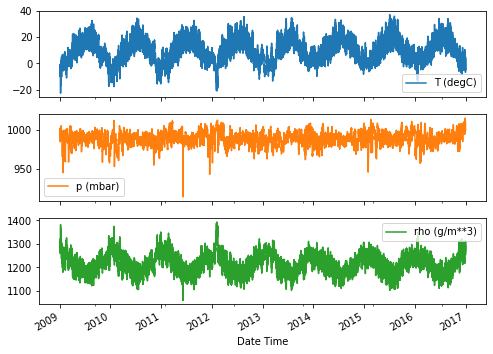

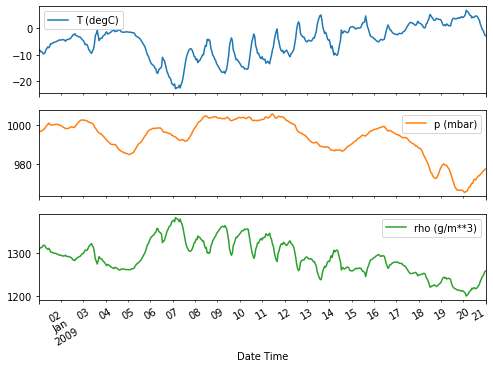

In [6]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

## Inspect & cleanup

Next look at the statistics of the dataset:

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


One thing that should stand out is the min value of the wind velocity, wv (m/s) and max. wv (m/s) columns. This -9999 is likely erroneous. There's a separate wind direction column, so the velocity should be >=0. Replace it with zeros

My way

In [8]:
df['max. wv (m/s)'] = df['max. wv (m/s)'].apply(lambda x: 0 if x<0 else x)
df['wv (m/s)'] = df['wv (m/s)'].apply(lambda x: 0 if x<0 else x)

The Tutorial way

In [9]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame
df['wv (m/s)'].min()

0.0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


### Feature engineering# 

In [11]:
df.head(1)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.5,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7


The last column of the data, wd (deg), gives the wind direction in units of degrees. Angles do not make good model inputs, 360° and 0° should be close to each other, and wrap around smoothly. Direction shouldn't matter if the wind is not blowing.

Text(0, 0.5, 'Wind Velocity [m/s]')

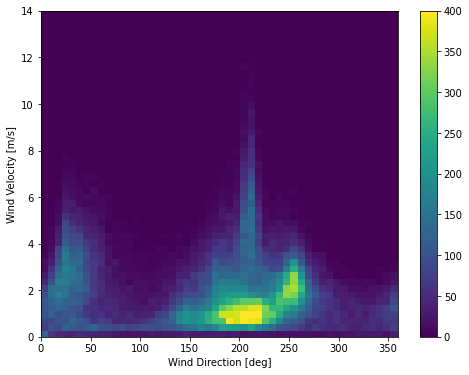

In [12]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

array([[<AxesSubplot:title={'center':'wd (deg)'}>,
        <AxesSubplot:title={'center':'wv (m/s)'}>]], dtype=object)

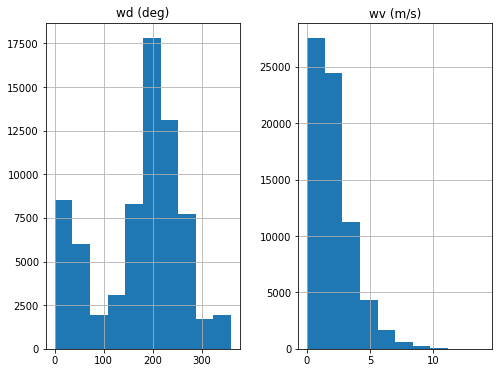

In [13]:
df[['wd (deg)','wv (m/s)']].hist()

But this will be easier for the model to interpret if you convert the wind direction and velocity columns to a wind vector:

In [14]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

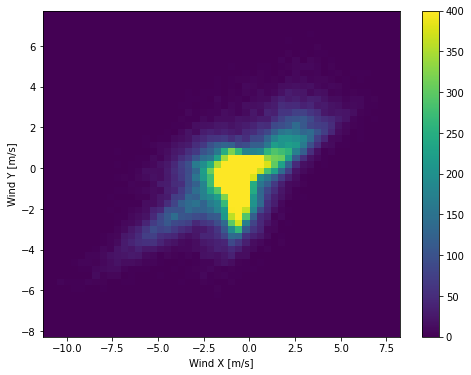

In [15]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')


To understand the idea behind this approach see : 
https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

**Time**

Similarly the Date Time column is very useful, but not in this string form. Start by converting it to seconds:

In [16]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [17]:
timestamp_s[:2]

5     1.230761e+09
11    1.230764e+09
Name: Date Time, dtype: float64

Similar to the wind direction the time in seconds is not a useful model input. Being weather data it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [18]:
seconds_in_day = 24*60*60

df['sin_time'] = np.sin(2*np.pi*timestamp_s/seconds_in_day)
df['cos_time'] = np.cos(2*np.pi*timestamp_s/seconds_in_day)


df.head(1)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,sin_time,cos_time
5,996.5,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,-0.5,0.866025


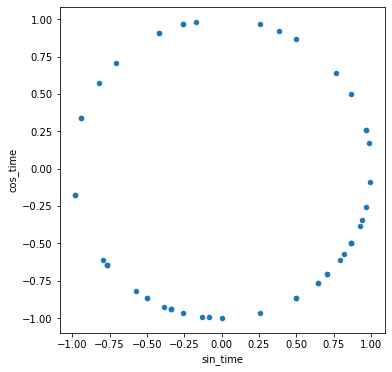

In [19]:
df.sample(50).plot.scatter('sin_time','cos_time').set_aspect('equal');

In [20]:
seconds_in_year = (365.2425)* seconds_in_day
df['sin_time_year'] = np.sin(2*np.pi*timestamp_s/seconds_in_day)
df['cos_time_year'] = np.cos(2*np.pi*timestamp_s/seconds_in_day)

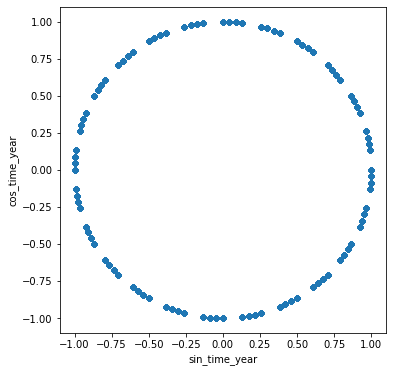

In [21]:
df.plot.scatter('sin_time_year','cos_time_year').set_aspect('equal')

## Split the data

We'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons.

It ensures that chopping the data into windows of consecutive samples is still possible.

It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [22]:
df.head(1)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,sin_time,cos_time,sin_time_year,cos_time_year
5,996.5,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,-0.5,0.866025,-0.5,0.866025


In [23]:
#Not shuffeled! it's time-dependant dataset
n = len(df)
train_df = df[0:int(n*0.7)] #70% training
val_df = df[int(n*0.7):int(n*0.9)] #20% validation
test_df = df[int(n*0.9):] # 10% testing

num_features = df.shape[1]

#### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

** The mean and standard deviation should only be computed using the training data ** so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages.

That's not the focus of this tutorial, and the validation and test sets ensure that you get (somewhat) honest metrics. So in the interest of simplicity this tutorial uses a simple average.

For more information about moving average 

see: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c

In [24]:
#Get training stat
train_mean = train_df.mean()
train_std = train_df.std()
#Apply them for train,val and test dfs
train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [25]:
#Plot the whole dataset after normlization 
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

In [26]:
df.head(1)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,sin_time,cos_time,sin_time_year,cos_time_year
5,996.5,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,-0.5,0.866025,-0.5,0.866025


In [27]:
#Melted version
df_std.head()

,Column,Normalized
0,p (mbar),0.945308
1,p (mbar),0.959770
2,p (mbar),0.986284
3,p (mbar),1.004362
4,p (mbar),1.061006


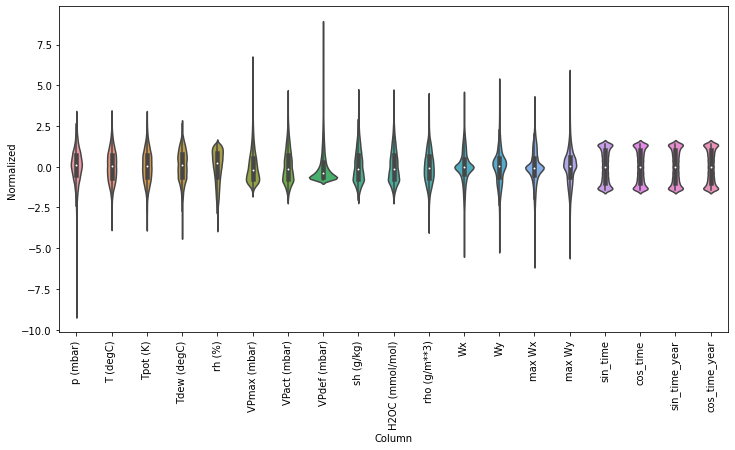

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

Now peek at the distribution of the features. Some features do have long tails, but there are no obvious errors like the -9999 wind velocity value.



## Data windowing

In [29]:
df.head(2)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,sin_time,cos_time,sin_time_year,cos_time_year
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,-0.500000,0.866025,-0.500000,0.866025
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,-0.258819,0.965926,-0.258819,0.965926


In [37]:
#The class takes datasets by default
class WindowGenerator():
 
    def __init__(self, input_width, label_width, shift,
          train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        
        self.shift = shift


        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(input_width)

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[-self.label_width:] 

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self,features):
        inputs = features[:, slice(0,self.input_width), :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
      inputs, labels = self.example
      inputs = np.array(inputs) 
      plt.figure(figsize=(12, 8))
      plot_col_index = self.column_indices[plot_col]
      max_n = min(max_subplots, len(inputs))
      for n in range(max_n):
        plt.subplot(3, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
          label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
          label_col_index = plot_col_index

        if label_col_index is None:
          continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
          predictions = model(inputs)
          plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
          plt.legend()

      plt.xlabel('Time [h]')
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

In [31]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w1

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

Given a list consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

The example w2, above, will be split like this:

In [32]:
# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

In [36]:
example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 19)
Inputs shape: (3, 6, 19)
labels shape: (3, 1, 1)


Typically data in TensorFlow is packed into arrays where the outermost index is across examples (the "batch" dimension). The middle indices are the "time" or "space" (width, height) dimension(s). The innermost indices are the features.

The code above took a batch of 3, 7-timestep windows, with 19 features at each time step. It split them into a batch of 6-timestep, 19 feature inputs, and a 1-timestep 1-feature label. The label only has one feature because the WindowGenerator was initialized with label_columns=['T (degC)']. Initially this tutorial will build models that predict single output labels.

In [38]:
w1.example

(<tf.Tensor: shape=(32, 6, 19), dtype=float32, numpy=
 array([[[-1.64343464e+00, -3.30239534e-01, -2.02293307e-01, ...,
           1.32898080e+00,  4.83687729e-01,  1.32898080e+00],
         [-1.65789688e+00, -3.55658501e-01, -2.25216612e-01, ...,
           1.15851998e+00,  8.11168849e-01,  1.15851998e+00],
         [-1.73623407e+00, -3.51036876e-01, -2.14901119e-01, ...,
           9.09116447e-01,  1.08336890e+00,  9.09116447e-01],
         [-1.80613494e+00, -2.26252794e-01, -8.42382908e-02, ...,
           5.97766817e-01,  1.28173792e+00,  5.97766817e-01],
         [-1.86639428e+00, -2.25097388e-01, -7.85074681e-02, ...,
           2.45689034e-01,  1.39275742e+00,  2.45689034e-01],
         [-1.94473147e+00, -5.56982914e-03,  1.47287071e-01, ...,
          -1.23123445e-01,  1.40886152e+00, -1.23123445e-01]],
 
        [[ 1.09113526e+00, -5.78652263e-01, -6.59613192e-01, ...,
           7.07195222e-01,  1.22476804e+00,  7.07195222e-01],
         [ 1.10921311e+00, -5.26658893e-01, -6.

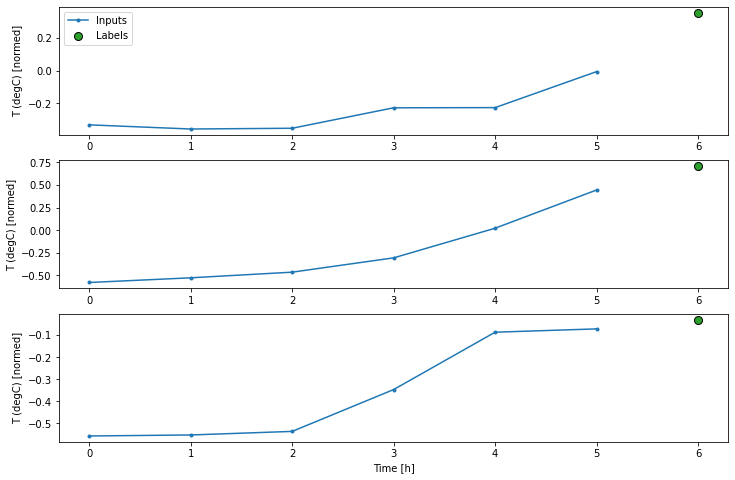

In [39]:
w1.plot()

## Create tf.data.Datasets

***tf.keras.preprocessing.timeseries_dataset_from_array***

Creates a dataset of sliding windows over a timeseries provided as array.

tf.keras.preprocessing.timeseries_dataset_from_array(
    data, targets, sequence_length, sequence_stride=1, sampling_rate=1,
    batch_size=128, shuffle=False, seed=None, start_index=None, end_index=None
)

In [41]:
train_df.head(0)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,sin_time,cos_time,sin_time_year,cos_time_year


In [42]:
data = np.array(train_df, dtype=np.float32)

In [43]:
print(len(train_df.columns)," columns")
print(len(train_df)," rows")
print(train_df.shape)
print(data.shape)
print(data.shape[0]) #Axis 0 is the time dim

19  columns
49063  rows
(49063, 19)
(49063, 19)
49063


The Dataset.element_spec property tells you the structure, dtypes and shapes of the dataset elements.

In [44]:
w1.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterating over a Dataset yields concrete batches:

In [45]:
example_labels.shape

TensorShape([3, 1, 1])

In [46]:
example_inputs.shape

TensorShape([3, 6, 19])

In [47]:
for example_inputs, example_labels in w1.train.take(2):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)
Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Single step models

The simplest model you can build on this sort of data is one that predicts a single feature's value, 1 timestep (1h) in the future based only on the current conditions.

So start by building models to predict the T (degC) value 1h into the future.

Configure a WindowGenerator object to produce these single-step (input, label) pairs:

In [51]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

The window object creates tf.data.Datasets from the training, validation, and test sets, allowing you to easily iterate over batches of data.

In [52]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 19)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict temperature 1h in the future given the current value of all features. The current values include the current temperature.

So start with a model that just returns the current temperature as the prediction, predicting "No change". This is a reasonable baseline since temperature changes slowly. Of course, this baseline will work less well if you make a prediction further in the future.

In [80]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

#forward pass in call
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [56]:
column_indices = {name: i for i, name in enumerate(df.columns)}
column_indices

{'H2OC (mmol/mol)': 9,
 'T (degC)': 1,
 'Tdew (degC)': 3,
 'Tpot (K)': 2,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'VPmax (mbar)': 5,
 'Wx': 11,
 'Wy': 12,
 'cos_time': 16,
 'cos_time_year': 18,
 'max Wx': 13,
 'max Wy': 14,
 'p (mbar)': 0,
 'rh (%)': 4,
 'rho (g/m**3)': 10,
 'sh (g/kg)': 8,
 'sin_time': 15,
 'sin_time_year': 17}

In [67]:
baseline = Baseline(label_index=column_indices['T (degC)'])

1


In [74]:
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [71]:
single_step_window.train.batch

<bound method DatasetV2.batch of <MapDataset shapes: ((None, 1, 19), (None, 1, 1)), types: (tf.float32, tf.float32)>>

In [81]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

439/439 [==============================] - 1s 2ms/step - loss: 0.0128 - mean_absolute_error: 0.0785

That printed some performance metrics, but those don't give you a feeling for how well the model is doing.

The WindowGenerator has a plot method, but the plots won't be very interesting with only a single sample. So, create a wider WindowGenerator that generates windows 24h of consecutive inputs and labels at a time.

The wide_window doesn't change the way the model operates. The model still makes predictions 1h into the future based on a single input time step. Here the time axis acts like the batch axis: Each prediction is made independently with no interaction between time steps

In [82]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['T (degC)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']

In [83]:
print('Input shape:', wide_window.example[0].shape) #0 is target
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
tf.Tensor(
[[[ 5.90982556e-01 -7.12679625e-01 -7.54744947e-01 ...  8.60998809e-01
   -1.12202704e+00  8.60998809e-01]
  [ 4.89746809e-01 -7.13835061e-01 -7.47867942e-01 ...  1.12203705e+00
   -8.60965848e-01  1.12203705e+00]
  [ 3.96947384e-01 -7.19612062e-01 -7.46721804e-01 ...  1.30661893e+00
   -5.41232467e-01  1.30661893e+00]
  ...
  [-6.91336691e-01 -4.27293807e-01 -3.71925771e-01 ... -1.84455201e-01
   -1.40218019e+00 -1.84455201e-01]
  [-7.13030100e-01 -4.36537087e-01 -3.79948914e-01 ...  1.84708640e-01
   -1.40218019e+00  1.84708640e-01]
  [-7.13030100e-01 -4.21516776e-01 -3.65048766e-01 ...  5.41293502e-01
   -1.30662525e+00  5.41293502e-01]]

 [[ 7.00654566e-01 -9.73801911e-01 -1.02180147e+00 ...  9.09116447e-01
    1.08336890e+00  9.09116447e-01]
  [ 7.44041324e-01 -9.78423536e-01 -1.03097069e+00 ...  5.97766817e-01
    1.28173792e+00  5.97766817e-01]
  [ 7.51272440e-01 -1.06276834e+00 -1.11464083e+00 ...  2.45689034e-01
    1.39275742e+00  2.456890

tf.Tensor(
[[[ 5.90982556e-01 -7.12679625e-01 -7.54744947e-01 ...  8.60998809e-01
   -1.12202704e+00  8.60998809e-01]
  [ 4.89746809e-01 -7.13835061e-01 -7.47867942e-01 ...  1.12203705e+00
   -8.60965848e-01  1.12203705e+00]
  [ 3.96947384e-01 -7.19612062e-01 -7.46721804e-01 ...  1.30661893e+00
   -5.41232467e-01  1.30661893e+00]
  ...
  [-6.91336691e-01 -4.27293807e-01 -3.71925771e-01 ... -1.84455201e-01
   -1.40218019e+00 -1.84455201e-01]
  [-7.13030100e-01 -4.36537087e-01 -3.79948914e-01 ...  1.84708640e-01
   -1.40218019e+00  1.84708640e-01]
  [-7.13030100e-01 -4.21516776e-01 -3.65048766e-01 ...  5.41293502e-01
   -1.30662525e+00  5.41293502e-01]]

 [[ 7.00654566e-01 -9.73801911e-01 -1.02180147e+00 ...  9.09116447e-01
    1.08336890e+00  9.09116447e-01]
  [ 7.44041324e-01 -9.78423536e-01 -1.03097069e+00 ...  5.97766817e-01
    1.28173792e+00  5.97766817e-01]
  [ 7.51272440e-01 -1.06276834e+00 -1.11464083e+00 ...  2.45689034e-01
    1.39275742e+00  2.45689034e-01]
  ...
  [ 1.051364

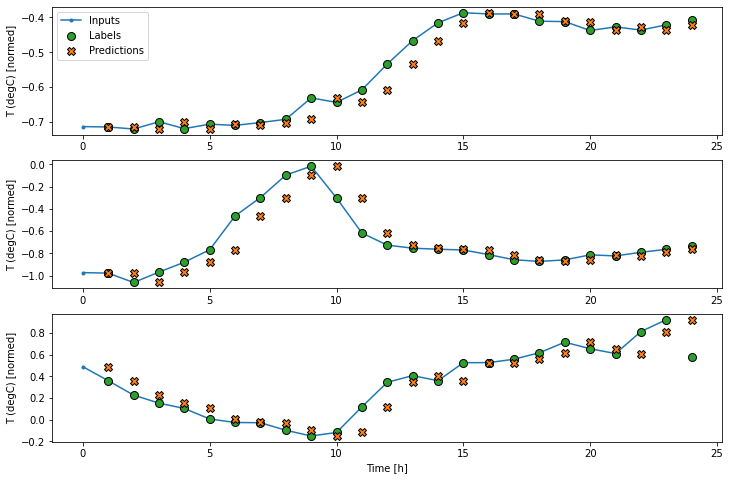

In [85]:
wide_window.plot(baseline)

In [87]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 19)
Output shape: (32, 1, 1)


In [88]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [89]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
1534/1534 [==============================] - 6s 4ms/step - loss: 0.1556 - mean_absolute_error: 0.2347 - val_loss: 0.0118 - val_mean_absolute_error: 0.0813

In [90]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
tf.Tensor(
[[[ 5.90982556e-01 -7.12679625e-01 -7.54744947e-01 ...  8.60998809e-01
   -1.12202704e+00  8.60998809e-01]
  [ 4.89746809e-01 -7.13835061e-01 -7.47867942e-01 ...  1.12203705e+00
   -8.60965848e-01  1.12203705e+00]
  [ 3.96947384e-01 -7.19612062e-01 -7.46721804e-01 ...  1.30661893e+00
   -5.41232467e-01  1.30661893e+00]
  ...
  [-6.91336691e-01 -4.27293807e-01 -3.71925771e-01 ... -1.84455201e-01
   -1.40218019e+00 -1.84455201e-01]
  [-7.13030100e-01 -4.36537087e-01 -3.79948914e-01 ...  1.84708640e-01
   -1.40218019e+00  1.84708640e-01]
  [-7.13030100e-01 -4.21516776e-01 -3.65048766e-01 ...  5.41293502e-01
   -1.30662525e+00  5.41293502e-01]]

 [[ 7.00654566e-01 -9.73801911e-01 -1.02180147e+00 ...  9.09116447e-01
    1.08336890e+00  9.09116447e-01]
  [ 7.44041324e-01 -9.78423536e-01 -1.03097069e+00 ...  5.97766817e-01
    1.28173792e+00  5.97766817e-01]
  [ 7.51272440e-01 -1.06276834e+00 -1.11464083e+00 ...  2.45689034e-01
    1.39275742e+00  2.456890

In [94]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 19)
Output shape: (32, 24, 1)


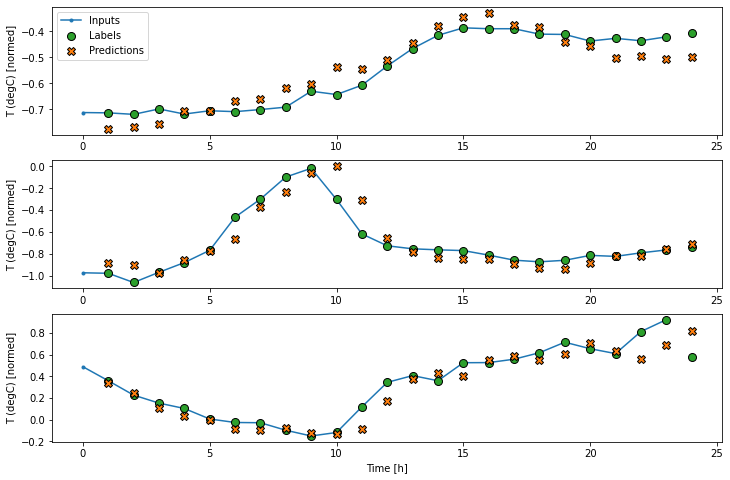

In [95]:
wide_window.plot(linear)


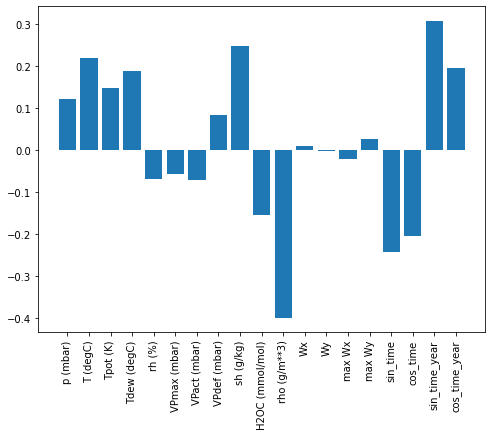

In [96]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)